__Libraries__

In [28]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from helpers import read_csv_with_pandas
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
# import xgboost as xgb
from sklearn.calibration import CalibratedClassifierCV
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_curve
from tqdm import tqdm

__Reading CSV__

In [12]:
df_train = pd.read_csv('data/aps_failure_training_set.csv')
df_test = pd.read_csv('data/aps_failure_test_set.csv')

In [13]:
df_train

,id,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,1,neg,76698,na,2130706438,280,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,2,neg,33058,na,0,na,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,3,neg,41040,na,228,100,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,4,neg,12,0,70,66,0,10,0,0,...,240,46,58,44,10,0,0,0,4,32
4,5,neg,60874,na,1368,458,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59996,neg,153002,na,664,186,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,59997,neg,2286,na,2130706538,224,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,59998,neg,112,0,2130706432,18,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,59999,neg,80292,na,2130706432,494,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [14]:
df_test

,id,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,1,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,2,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,3,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,4,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,5,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,15996,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,15997,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,15998,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,15999,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


__Replace Nan Values__

In [15]:
df_train['class'] = df_train['class'].replace(['pos','neg'],[1,0])
df_train = df_train.replace('na',np.NaN)

#df_test['class'] = df_test['class'].replace(['pos','neg'],[1,0])
df_test = df_test.replace('na',np.NaN)

__Deleting Features With Zero Variance__

In [16]:
df_train = df_train.astype(float)
for i in df_train:
  if df_train[i].std() == 0:
    df_train = df_train.drop([i],axis=1)
    print('The feature with zero variance is : ',i)
df_train.shape

df_test = df_test.astype(float)
for i in df_test:
  if df_test[i].std() == 0:
    df_test = df_test.drop([i],axis=1)
    print('The feature with zero variance is : ',i)
df_test.shape

The feature with zero variance is :  cd_000
The feature with zero variance is :  cd_000


(16000, 170)

__Deleting Duplicates__

In [17]:
df_train = df_train.drop_duplicates(keep = 'first')
df_train = df_train.T.drop_duplicates().T
print(df_train.shape)

df_test = df_test.drop_duplicates(keep = 'first')
df_test = df_test.T.drop_duplicates().T
print(df_test.shape)

(60000, 171)
(16000, 170)


__Calculating Missing Values__

In [18]:
missing_feature_count = dict(df_train.drop('class',axis=1).isnull().sum())
missing_feature_count = dict(sorted(missing_feature_count.items(), key=lambda item:item[1],reverse=True))

__Missing Value Imputation__

We will eliminate features with missing value greater than 60%.

We will perform median imputation of features with missing values less than 20%

For the features between 20%-60% missing values, we will perform model based imputation called MICE imputation.

In [19]:
features_tobe_eliminated = []
median_imp_features = []
model_imp_features = []
for i in missing_feature_count.keys():
  percent = (missing_feature_count[i]/df_train.shape[0])
  if percent > 0.6:
    features_tobe_eliminated.append(i)
  elif percent < 0.2:
    median_imp_features.append(i)
  else:
    model_imp_features.append(i)

print("Features to be eliminated : ",features_tobe_eliminated)
print("Number of features to be eliminated : ",len(features_tobe_eliminated))
print("\nFeatures for model imputation : ",model_imp_features)
print("Number of features for model imputation : ",len(model_imp_features))
print("\nFeatures for median imputaton : ",median_imp_features)
print("Number of features for median imputaton : ",len(median_imp_features))

Features to be eliminated :  ['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000', 'bm_000']
Number of features to be eliminated :  8

Features for model imputation :  ['bl_000', 'bk_000', 'ad_000', 'cf_000', 'cg_000', 'ch_000', 'co_000', 'ct_000', 'cu_000', 'cv_000', 'cx_000', 'cy_000', 'cz_000', 'da_000', 'db_000', 'dc_000']
Number of features for model imputation :  16

Features for median imputaton :  ['ec_00', 'cm_000', 'cl_000', 'ed_000', 'ak_000', 'ca_000', 'dm_000', 'df_000', 'dg_000', 'dh_000', 'dl_000', 'dj_000', 'dk_000', 'eb_000', 'di_000', 'ac_000', 'bx_000', 'cc_000', 'bd_000', 'ds_000', 'dt_000', 'dp_000', 'dq_000', 'dr_000', 'du_000', 'dv_000', 'bc_000', 'cp_000', 'de_000', 'do_000', 'dy_000', 'ef_000', 'ar_000', 'bz_000', 'dx_000', 'dz_000', 'ea_000', 'eg_000', 'be_000', 'dd_000', 'ce_000', 'ax_000', 'ae_000', 'af_000', 'av_000', 'bf_000', 'bs_000', 'cb_000', 'bu_000', 'bv_000', 'cq_000', 'dn_000', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_

__Train & CV Split__

In [20]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

X_train = df_train.drop('class',axis=1)
y_train = df_train['class']

X_test = df_test

X_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

print(10*'='+" Train Data "+10*'=')
print(X_train.shape)
print(y_train.shape)

print(10*'='+" Test Data "+10*'=')
print(X_test.shape)

========== Train Data ==========
(60000, 170)
(60000,)
========== Test Data ==========
(16000, 170)


__Median Imputation__

In [21]:
median_imputer = SimpleImputer(strategy='median')
median_imputer.fit(X_train[median_imp_features])

X_train_median = median_imputer.transform(X_train[median_imp_features])
X_test_median = median_imputer.transform(X_test[median_imp_features])

In [22]:
X_train_mice = X_train.copy()
X_train_mice[median_imp_features] = X_train_median
X_train_mice = X_train_mice.drop(features_tobe_eliminated,axis=1)
print(X_train_mice.shape)

X_test_mice = X_test.copy()
X_test_mice[median_imp_features] = X_test_median
X_test_mice = X_test_mice.drop(features_tobe_eliminated,axis=1)
print(X_test_mice.shape)

(60000, 162)
(16000, 162)


__Median Imputation for Mice Part (Mice runs to slow)__

In [23]:
def median_imputation(df):
    median_imputer = SimpleImputer(strategy='median')
    median_imputer.fit(df)
    df_imputed = median_imputer.transform(df)
    #df_imputed = pd.DataFrame(df_imputed,columns=df.columns)
    return df_imputed, median_imputer

In [47]:
X_train_imputed, median_imputer = median_imputation(X_train_mice)
#X_cv_imputed = median_imputer.transform(X_cv_mice)
X_test_imputed = median_imputer.transform(X_test_mice)

X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train_mice.columns)
#X_cv_imputed = pd.DataFrame(X_cv_imputed, columns=X_cv_mice.columns)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test_mice.columns)
X_train_imputed.to_csv('data/x_train_imputed.csv')
X_test_imputed.to_csv('data/x_test_imputed.csv')

__Mice Imputation #Do not Use__

In [25]:
"""def normalize(df):
    x = df
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    return x_scaled, scaler"""

'def normalize(df):\n    x = df\n    scaler = StandardScaler()\n    x_scaled = scaler.fit_transform(x)\n    return x_scaled, scaler'

In [26]:
"""X_train_scaled, scaler = normalize(X_train_mice)
X_cv_scaled = scaler.transform(X_cv_mice)
X_test_scaled = scaler.transform(X_test_mice)

X_train_mice = pd.DataFrame(X_train_scaled, columns= X_train_mice.columns)
X_cv_mice = pd.DataFrame(X_cv_scaled, columns= X_cv_mice.columns)
X_test_mice = pd.DataFrame(X_test_scaled, columns= X_test_mice.columns)"""

'X_train_scaled, scaler = normalize(X_train_mice)\nX_cv_scaled = scaler.transform(X_cv_mice)\nX_test_scaled = scaler.transform(X_test_mice)\n\nX_train_mice = pd.DataFrame(X_train_scaled, columns= X_train_mice.columns)\nX_cv_mice = pd.DataFrame(X_cv_scaled, columns= X_cv_mice.columns)\nX_test_mice = pd.DataFrame(X_test_scaled, columns= X_test_mice.columns)'

In [27]:
"""def mice_imputation(df):
  mice_imputer = IterativeImputer(random_state=42, max_iter=10)
  mice_imputer.fit(df)
  df_imputed = mice_imputer.transform(df)
  #df_imputed = pd.DataFrame(df_imputed,columns=df.columns)
  return df_imputed, mice_imputer"""

'def mice_imputation(df):\n  mice_imputer = IterativeImputer(random_state=42, max_iter=10)\n  mice_imputer.fit(df)\n  df_imputed = mice_imputer.transform(df)\n  #df_imputed = pd.DataFrame(df_imputed,columns=df.columns)\n  return df_imputed, mice_imputer'

In [28]:
"""X_train_imputed, mice_imputer = mice_imputation(X_train_mice)
X_cv_imputed = mice_imputer.transform(X_cv_mice)
X_test_imputed = mice_imputer.transform(X_test_mice)

X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train_mice.columns)
X_cv_imputed = pd.DataFrame(X_cv_imputed, columns=X_cv_mice.columns)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test_mice.columns)"""

'X_train_imputed, mice_imputer = mice_imputation(X_train_mice)\nX_cv_imputed = mice_imputer.transform(X_cv_mice)\nX_test_imputed = mice_imputer.transform(X_test_mice)\n\nX_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train_mice.columns)\nX_cv_imputed = pd.DataFrame(X_cv_imputed, columns=X_cv_mice.columns)\nX_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test_mice.columns)'

__LDA__

In [29]:
lda = LinearDiscriminantAnalysis(n_components=1)

# Fit the LDA model with the normalized features and target variable
lda.fit(X_train_imputed, y_train)

# Transform the features using the fitted LDA model
x_train_lda = lda.transform(X_train_imputed)
x_test_lda = lda.transform(X_test_imputed)

lda_df = pd.DataFrame(data=x_train_lda, columns=['LDA_Component_1'])

__Oversampling With SMOTE__

In [30]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# define pipeline
over = SMOTE(sampling_strategy=0.5,random_state=42)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
x_train_lda_final, y_train_final = pipeline.fit_resample(x_train_lda, y_train)
pd.DataFrame(y_train_final).value_counts()

class
0.0      49166
1.0      29500
Name: count, dtype: int64

__Logistic Regression__

In [30]:
best_LR_model = SGDClassifier(alpha=0.1,loss='log_loss' , n_jobs = -1, random_state=42, class_weight= 'balanced')
calib_LR = CalibratedClassifierCV(estimator=best_LR_model, cv=10, method='sigmoid')
calib_LR.fit(x_train_lda_final,y_train_final)

y_pred = calib_LR.predict(x_train_lda_final)
f1_scr = f1_score(y_train_final,y_pred, average = 'macro')
print("Macro average f1-score on Train Data : ", f1_scr)
cm_lr = confusion_matrix(y_train_final, y_pred)

y_pred = calib_LR.predict(x_test_lda)

Macro average f1-score on Train Data :  0.9356456976608769


In [31]:
best_SVM_model = SGDClassifier(alpha=0.1,loss='hinge',class_weight = 'balanced' , n_jobs = -1, random_state=42)
calib_SVM = CalibratedClassifierCV(base_estimator=best_SVM_model, cv=10, method='sigmoid')
calib_SVM.fit(x_train_lda_final,y_train_final)

y_pred = calib_SVM.predict(x_train_lda_final)
f1_scr = f1_score(y_train_final,y_pred, average = 'macro')
print("Macro average f1-score on Train Data : ", f1_scr)
cm_svm = confusion_matrix(y_train_final, y_pred)

y_pred = calib_LR.predict(x_test_lda)

/home/berat/.local/lib/python3.8/site-packages/sklearn/calibration.py:300: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Macro average f1-score on Train Data :  0.9464832926946085


__Finding Best Parameters For Random Forest__

In [33]:
max_depth = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
n_estimators = [10, 25, 50, 75, 100, 125, 150, 175, 200]
min_samples_split = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
param = {'max_depth':max_depth,'n_estimators':n_estimators,'min_samples_split':min_samples_split}
clf = RandomForestClassifier(class_weight = 'balanced' , random_state=42)
tuning = RandomizedSearchCV(estimator=clf,param_distributions=param,cv=3,scoring='f1_macro',n_jobs=-1,return_train_score=True,verbose=10)
tuning.fit(x_train_lda,y_train)
best = tuning.best_params_
print(best)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 20}


__Random Forest Classifier__

In [32]:
best_RF_model = RandomForestClassifier(max_depth = 45, n_estimators =125 ,min_samples_split=30,n_jobs=-1,class_weight = 'balanced' , random_state=42, criterion='gini')
calib_RF = CalibratedClassifierCV(estimator=best_RF_model, cv=3, method='sigmoid')
calib_RF.fit(x_train_lda,y_train)

y_pred = calib_RF.predict(x_train_lda_final)
f1_scr = f1_score(y_train_final,y_pred, average = 'macro')
print("Macro average f1-score on Train Data : ", f1_scr)
cm_rf = confusion_matrix(y_train_final, y_pred)

y_pred = calib_RF.predict(x_test_lda)
#f1_scr = f1_score(y_test,y_pred, average = 'macro')
#print("Macro average f1-score on Test Data : ", f1_scr)

Macro average f1-score on Train Data :  0.8990766192253232


In [37]:
y_pred_df = pd.DataFrame(y_pred, columns=['class'])
y_pred_df['id'] = df_test['id']
y_pred_df['class'] = y_pred_df['class'].replace([1,0],['pos','neg'])
y_pred_df.to_csv('submissions/predicted_labels.csv', index=False)

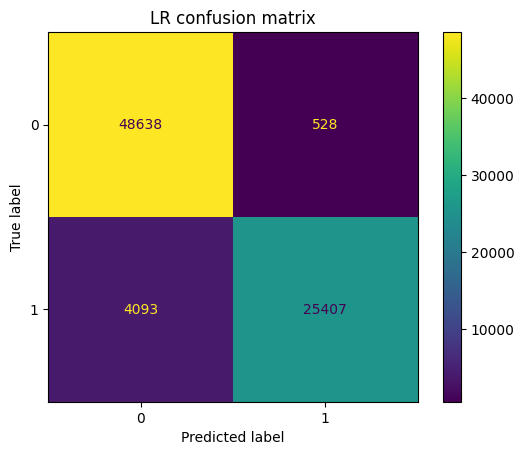

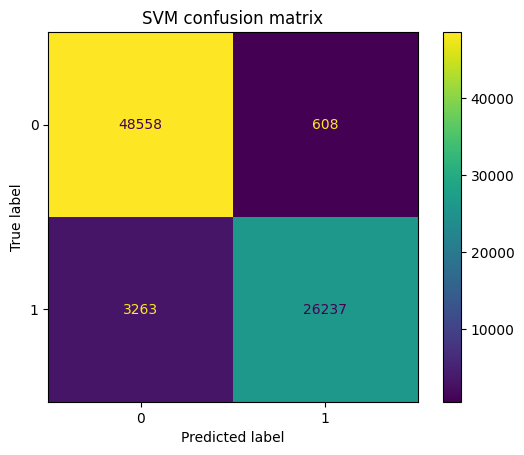

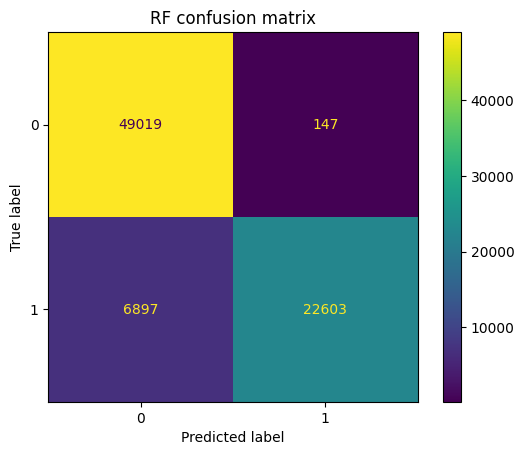

In [43]:
disp = ConfusionMatrixDisplay(cm_lr)
disp.plot()
disp.ax_.set_title('LR confusion matrix')
disp.figure_.savefig('plots/conf_lr.png',dpi=300)

disp = ConfusionMatrixDisplay(cm_svm)
disp.plot()
disp.ax_.set_title('SVM confusion matrix')
disp.figure_.savefig('plots/conf_svm.png',dpi=300)

disp = ConfusionMatrixDisplay(cm_rf)
disp.plot()
disp.ax_.set_title('RF confusion matrix')
disp.figure_.savefig('plots/conf_rf.png',dpi=300)